In [1]:
# определения

import pandas as pd
import numpy as np
import seaborn as sns
import re
import pickle
import pymorphy2
import matplotlib.pyplot as plt
#import pandas_profiling
import datetime

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


morph = pymorphy2.MorphAnalyzer()
vectorizer = CountVectorizer()
plt.style.use('dark_background')
# Options for pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 50
pd.options.display.min_rows = 30

In [18]:
# здесь "на память" описываю операторы в одну - две строчки 

# PANDAS
# data.iloc[[0,3,100]] - показать строки по индексу 0,3,100
# data.iloc[:,:8] - выбрать первые 8 колонок и все строки
# data[data.Survived == 0 ] - отбор по значению
# data[data.Survived == 0 ][['Sex','Age']] - отбор  и показать только выбранные колонки
# data['new_col'] = data['Survived'] - в новую колонку добавить значение старой колонки
# data.rename(columns = {'new_col':'del_col'}) - переименовать колонку
# data = data.drop(['new_col'],axis = 'columns') - удалить колонку
# del data["column"] - еще один способ удалить колонку
# print(data.groupby(['Sex','Survived'])['PassengerId'].count()) - сгруппировать 
# по колонкам 'Sex','Survived' и подсчету по колонке PassengerId
# data.isna().sum() - показать сколько пустых значений в каждой колонке
# data.Survived.value_counts() - показать сколько уникальных значений в колонке  Survived
# data.Survived.max() - показать максимальное значение в колонке  Survived
# data.Survived.nlagerset(3) - показать 3 максимальных  значения в колонке  Survived
# data.Survived.idxmax() - показать индекс максимальноого значения в колонке  Survived
# data.loc[23] - показать строку 23
# data = data.dropna() - удалить все строки с пропусками
# data.Sex.replace('male', 0, inplace=True) - заменить значения в колонке Sex: mail - 0
# test_out = pd.DataFrame({'PassengerId': test_df.index,'Survived': preds})
# создать новый dataframe для выгрузки на кагл
# data = pd.read_excel("resolution_100.xlsx") - прочитать файл excel
# data.describe() - получаем описание фрэйма, макс, мин, количество и прочее  
# data.fillna(method='ffill', inplace=True) - заполнить все пустые предыдущими значениями
# data = pandas.get_dummies(data,columns=['columns']) - раскрытие строк через доп. столбцы
# data = pd.concat([data_train,data_test]) - объединение таблиц
# data = data.assign(type_age="") - добавить колонку
# data.loc[1,"type_age"] = "a" - записать значение в колонку по строке
# pd.read_html('http://www.contextures.com/xlSampleData01.html') - на сайте найдет таблицы и считает их

# def valuation_formula(x, y): # заполнение ячеек через lambda
#   return x * y * 0.5
# data['price'] = data.apply(lambda row: valuation_formula(row['x'], row['y']), axis=1)

# for idx,row in anime[:2].iterrows(): - обход элементов dataframe
#    print(idx, row)
# data['price'] = data['price'].apply(функция) - применение функции к столбцу
# data.map({'cat': 'kitten', 'dog': 'puppy'}) - замена значений по словарю

# sex_stats = df.pivot_table(values='suicides_no', index=['year'], columns=['sex'], aggfunc='mean')
# Как и в Excel, здесь есть сводные таблицы (pivot_table). Параметрами метода являются:
# values – список переменных, по которым будут считаться статистики,
# index – список переменных, по которым нужно сгруппировать данные, будут индексами сводной таблицы,
# columns – список переменных, по которым нужно сгруппировать данные, будут столбцами сводной таблицы,
# aggfunc — функция аггрегации, т.е. рассчитываемая статистика для данных

#PANDAS PROFILING
# pandas_profiling.ProfileReport(df)

# SEABORN
# sns.heatmap(data.corr()) - вывести график корреляций по всем колонкам
# sns.boxplot(titanic['age']) - ящик с усами
# sns.countplot(x) - строит bar по данным
# sns.countplot(x="pclass", data=titanic, hue="sex") - бар по двум колонкам

# SKLEARN
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
# разбить данные на тренировочную и тестовую выборку
# 20 процентов на тестовую , случайность выборки зафиксирована
# accuracy_score(y_test,y_pred) - коэффециент проверки на проверочной выборке
# vectorizer.get_feature_names() - посмотреть словарь векторов текста
# чтобы получить сгенерированный словарь, из приведенной структуры CountVectorizer, 
# стоит отметить что порядок совпадает с матрице
# text_vector_array = text_vector.toarray() - покаазть матрицу

# kf = KFold(n_splits=5, random_state=1, shuffle=True) подготовка кросс-валидации
# model = RandomForestRegressor(random_state=1) объявляем модель
# score = np.mean(cross_val_score(estimator=model, X=X, y=y, cv=kf, scoring='r2')) - рассчитываем коэффициент r2

# PICKLE
# model = pickle.load(open("filename", 'rb')) - загрузка модели из файла
# pickle.dump(model, open("filename", 'wb')) - сохрванение модели в файл

# MATPLOTLIB
# plt.plot(x, y, label='sin') - нарисовать простой график
# plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='plasma',label='sin') - или рисуем точки на графике
# plt.grid() - показать сетку
# plt.xlabel('Ось x') - название оси Х
# plt.colorbar() -  показать легенду цветов, если c=colors
# plt.legend() - показать легенду
# plt.show() - показать график
# plt.savefig('имя_файла') - сохранение графика
# plt.hexbin(x, y, cmap='inferno') - тепловая карта
# plt.hist(x, color='r', orientation='horizontal') - сторим гистограмму

In [ ]:
# из примера титаник сайта кагл DecisionTreeClassifier
# dt = DecisionTreeClassifier(random_state=1)
# dt.fit(X_train, y_train)
# preds = dt.predict(X_test)
# acc = accuracy_score(y_true=y_test, y_pred=preds)
# f1 = f1_score(y_true=y_test, y_pred=preds)
# print(classification_report(y_true=y_test, y_pred=preds))

In [ ]:
# предсказание простое RandomForestClassifier
# clf = RandomForestClassifier(random_state=241)
# clf.fit(X, Y)
## расчет веса показателей
# importances = clf.feature_importances_
# print(importances)

In [ ]:
# использование GridSearchCV на примере RandomForestClassifier

# clf = RandomForestClassifier()

# здесь пишем какие параметры будет перебирать

# param_greed = {
#    "max_depth" : [2,5,10],
#    "criterion" : ['gini', 'entropy'],
#    "min_samples_split" : [2,5,10],
#    "min_samples_leaf" : [1,5,10],
#}

# пишем каие параметры перебираем scoring = как оцениваем  ,
# cv = сколько тестовых выборок, n_jobs = -1 используем все процссоры
#GS = GridSearchCV(clf,param_greed,scoring = 'roc_auc',cv = 6,n_jobs = -1)
#GS.fit(X,Y)

# лучший показатель
#GS.best_score_

# лучшие параметры
# GS.best_params_

# обращаемся
# GS.best_estimator_.feature_importances_

# предсказываем
# GS.best_estimator_.predict(may_sample_dataframe)

In [2]:
# универсальные функции

# загрузать файл из csv
def read_csv(path,index_c = ""):
    if index_c == "":
        return pd.read_csv(path)
    else:
        return pd.read_csv(path,index_col=index_c)
    
# показать все уникальные значения во всех колонках
def columns_unique(data):
    for col in data.columns:
        print(col, data[col].unique())

# заполнить пустые значения средним значением
def null_to_mean(data,column):
    num_mean = data[column].mean()
    data[column].fillna(num_mean, inplace=True)

# заполнить пустые значения модой
def null_to_mode(data,column):
    num_mode  = data[column].mode().values[0]
    data[column].fillna(num_mode, inplace=True)

# функция для лемматизации
def lemmatize(text):
    text_str = str(text)
    text_str = re.sub(r'[^\w\s]+|[\d]+', r'',text_str).strip()
    words = text_str.split() # разбиваем текст на слова
    res = ""
    for word in words:
        p = morph.parse(word)[0]
        res = res + " " + p.normal_form
    return res

# провести лемматизацию датафрэйм
def lemma_dataframe(data,column):
    data[column] = data.apply(lambda row: lemmatize(row[column]), axis=1)
    
# векторизация, создание векторов
def vector_text(data,column):
    text = data[column]
    # создаем векторы
    return vectorizer.fit_transform(text)  

# DATA

In [3]:
data = pd.read_excel("polomki_podg_2.xlsx")

In [5]:
data_count = data.groupby(by = 'tip_ts').count()


In [229]:
data_count.sort_values(by="date_")

,year_v,probeg,ob_st_rem,rem_v_posl_mes,sum_rem_v_posl_mes,prizn,date_
tip_ts,,,,,,,
TCM FD50T9,9,9,9,9,9,9,9
Автомобиль грузовой HINO-300 XZU720L-QKFRPW3,10,10,10,10,10,10,10
Ролл-трейлер г/п 65-75т.,10,10,10,10,10,10,10
Автомобиль Hyundai SANTA FE,12,12,12,12,12,12,12
Автомобиль Тойота Камри 2005 г/в,12,12,12,12,12,12,12
МАШИНА ПОДМЕТАЛЬНО УБОРОЧНАЯ HAKO-CITYMASTER,13,13,13,13,13,13,13
ЭКСКАВАТОР КОЛЕСНЫЙ VOLVO,13,13,13,13,13,13,13
АВТОМОБИЛЬ ЛЕГКОВОЙ Н-1,16,16,16,16,16,16,16
Автомашина КО-505А вакуумная КАМАЗ,22,22,22,22,22,22,22


In [8]:
data_roll = data[data.tip_ts == "Тойота 7FD40"]

# RandomForestClassifier

In [232]:
X_ = data_roll[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"]]
y_ = data_roll.prizn

In [235]:
clf = RandomForestClassifier()

# здесь пишем какие параметры будет перебирать

param_greed = {
    "max_depth" : [2,5,50],
    "criterion" : ['gini', 'entropy'],
    "min_samples_split" : [2,5,50],
    "min_samples_leaf" : [1,5,50],
}

# пишем каие параметры перебираем scoring = как оцениваем  ,
#cv = сколько тестовых выборок, n_jobs = -1 используем все процссоры
GS = GridSearchCV(clf,param_greed,scoring = 'roc_auc',cv = 6,n_jobs = -1)
GS.fit(X_,y_)

# лучший показатель
print(GS.best_score_)

# лучшие параметры
print(GS.best_params_)

# обращаемся
# GS.best_estimator_.feature_importances_

# предсказываем
# GS.best_estimator_.predict(may_sample_dataframe)

0.7710776362815905
{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 50, 'min_samples_split': 50}


# анализ данных

In [9]:
data_roll

,tip_ts,year_v,probeg,ob_st_rem,rem_v_posl_mes,sum_rem_v_posl_mes,prizn,date_
11434,Тойота 7FD40,2002,3786.500,45628.640,0,0.000,1,2012-12-31 23:59:59
11435,Тойота 7FD40,1999,1283.400,126381.390,1,1046.140,1,2012-12-31 23:59:59
11436,Тойота 7FD40,2001,4121.200,38650.510,0,0.000,1,2012-12-31 23:59:59
11437,Тойота 7FD40,2001,6520.000,127852.760,0,0.000,1,2012-12-31 23:59:59
11438,Тойота 7FD40,2003,1695.000,105575.460,1,66844.660,0,2012-12-31 23:59:59
11439,Тойота 7FD40,2001,1972.400,104685.210,0,0.000,0,2012-12-31 23:59:59
11440,Тойота 7FD40,2002,4053.000,26091.880,0,0.000,1,2012-12-31 23:59:59
11441,Тойота 7FD40,2002,2603.500,18865.310,0,0.000,0,2012-12-31 23:59:59
11442,Тойота 7FD40,2001,531.000,100340.290,1,63299.060,1,2012-12-31 23:59:59
11443,Тойота 7FD40,2001,1464.000,30888.290,1,7513.000,0,2012-12-31 23:59:59


In [19]:
data_roll[data_roll["probeg"]>=10000]

,tip_ts,year_v,probeg,ob_st_rem,rem_v_posl_mes,sum_rem_v_posl_mes,prizn,date_
11948,Тойота 7FD40,2001,10171.000,209220.490,1,1161.270,1,2014-02-28 23:59:59
11982,Тойота 7FD40,2001,10450.000,215341.750,1,6121.260,1,2014-03-31 23:59:59
12016,Тойота 7FD40,2001,10691.000,248849.750,1,33508.000,0,2014-04-30 23:59:59
12050,Тойота 7FD40,2001,10850.000,248849.750,0,0.000,0,2014-05-31 23:59:59
12083,Тойота 7FD40,2001,11043.000,248849.750,0,0.000,1,2014-06-30 23:59:59
12115,Тойота 7FD40,2001,11165.000,249277.750,1,428.000,0,2014-07-31 23:59:59
12147,Тойота 7FD40,2001,11165.000,249277.750,0,0.000,1,2014-08-31 23:59:59
12179,Тойота 7FD40,2001,11218.000,259235.680,1,9957.930,0,2014-09-30 23:59:59
12211,Тойота 7FD40,2001,11403.000,259235.680,0,0.000,1,2014-10-31 23:59:59
12213,Тойота 7FD40,2002,10156.000,150573.700,1,415.500,0,2014-10-31 23:59:59


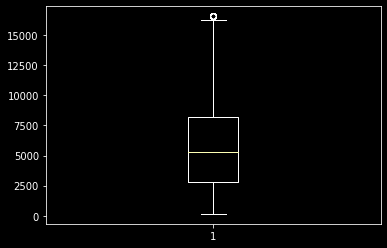

In [16]:
plt.boxplot(data_roll["probeg"])
plt.show()